In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv("D:/STUDIA/SGH_mag/SEMESTR_1/Data_Mining/Projekt/airline_satisfaction.csv")
train = pd.read_csv("D:/STUDIA/SGH_mag/SEMESTR_1/Data_Mining/Projekt/train.csv")
test = pd.read_csv("D:/STUDIA/SGH_mag/SEMESTR_1/Data_Mining/Projekt/train.csv")

In [ ]:
df = df.drop(['Unnamed: 0', 'X', 'id'], axis=1) #drop useless columns

NameError: name 'df' is not defined

In [3]:
# Drop unnecessary columns
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

# **EDA**

### Missing data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer.Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type.of.Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight.Distance                    129880 non-null  int64  
 6   Inflight.wifi.service              129880 non-null  int64  
 7   Departure.Arrival.time.convenient  129880 non-null  int64  
 8   Ease.of.Online.booking             129880 non-null  int64  
 9   Gate.location                      129880 non-null  int64  
 10  Food.and.drink                     129880 non-null  int64  
 11  Online.boarding                    1298

In [12]:
df.describe()

,Age,Flight.Distance,Inflight.wifi.service,Departure.Arrival.time.convenient,Ease.of.Online.booking,Gate.location,Food.and.drink,Online.boarding,Seat.comfort,Inflight.entertainment,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Most variables represent rating of service (scale 1 to 5). 0 means lack of response

The youngest customer - 7, the oldest customer - 85, average - 39 years

The top rated service by average - Inflight

In [14]:
df.isna().sum() #393 observations for Arrival Delay in Minutes
#decision trees can cope with missings so dropping them makes no sense

Gender                                 0
Customer.Type                          0
Age                                    0
Type.of.Travel                         0
Class                                  0
Flight.Distance                        0
Inflight.wifi.service                  0
Departure.Arrival.time.convenient      0
Ease.of.Online.booking                 0
Gate.location                          0
Food.and.drink                         0
Online.boarding                        0
Seat.comfort                           0
Inflight.entertainment                 0
On.board.service                       0
Leg.room.service                       0
Baggage.handling                       0
Checkin.service                        0
Inflight.service                       0
Cleanliness                            0
Departure.Delay.in.Minutes             0
Arrival.Delay.in.Minutes             393
satisfaction                           0
dtype: int64

In [27]:
#checking correctness of categorical variables
print(df['Gender'].unique())
print(df['Type.of.Travel'].unique())
print(df['Class'].unique())
print(df['satisfaction'].unique())
#no need to transform to binary - decision trees handle categorical

['Female' 'Male']
['Business travel' 'Personal Travel']
['Eco' 'Business' 'Eco Plus']
['satisfied' 'neutral or dissatisfied']


## Visualisation

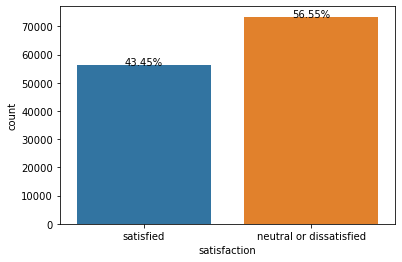

In [33]:
ax = sns.countplot(x='satisfaction', data=df)
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{(height/total)*100:.2f}%', ha="center")
#data can be considered as balanced - no signification disproportion of target variable

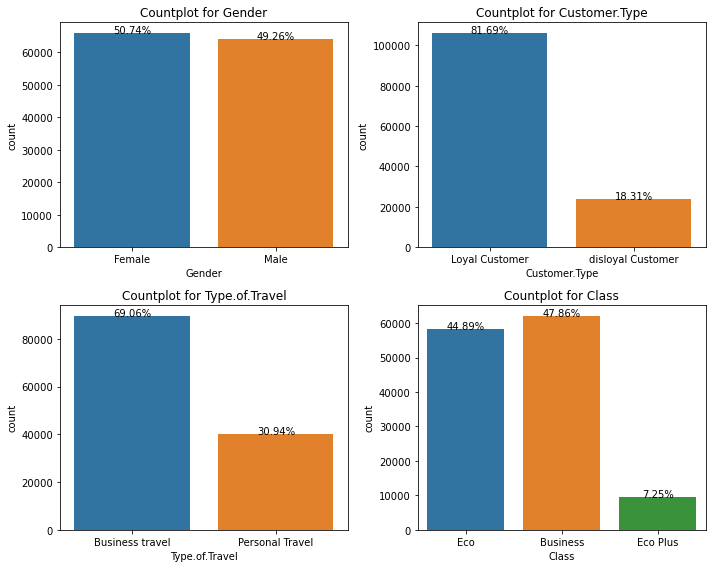

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
categorical_columns = df.select_dtypes(include=['object']).columns
for i, column in enumerate(categorical_columns.drop('satisfaction')):
    ax = axes[i]
    sns.countplot(x=column, data=df, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{(height/total)*100:.2f}%', ha="center")
        ax.set_title(f'Countplot for {column}')
plt.tight_layout()

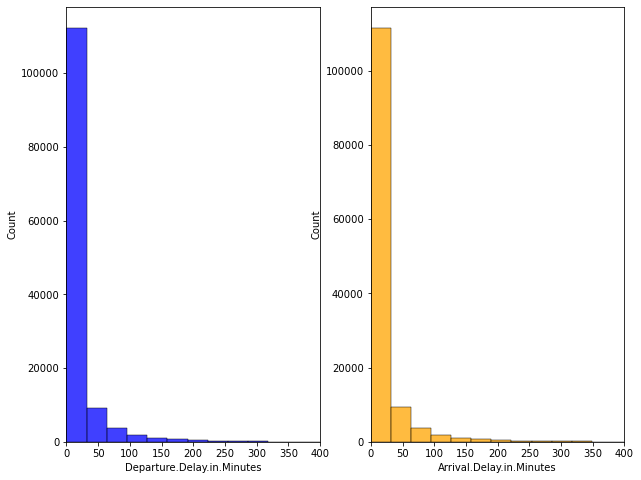

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
sns.histplot(data=df, x='Departure.Delay.in.Minutes', bins=50, kde=False, color='blue', ax=axes[0])
sns.histplot(data=df, x='Arrival.Delay.in.Minutes', bins=50, kde=False, color='orange', ax=axes[1])
for ax in axes:
    ax.set_xlim(0, 400)
#no difference between arrivals and departures

In [4]:
print(train['Type_of_Travel'].unique())
print(train['Class'].unique())
print(train['Customer_Type'].unique())
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
print(train['Type_of_Travel'].unique())
print(train['Class'].unique())
print(train['Customer_Type'].unique())

['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']
['Loyal Customer' 'disloyal Customer']
[1 0]
[2 0 1]
[0]


In [5]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
#modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)

In [6]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service',
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [7]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix
from matplotlib import pyplot as plt
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    #y_prob = model.predict_proba(X_test)[:,1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model,X_test,y_test)


    return model, accuracy, roc_auc, time_taken

Accuracy = 0.8148964428703419
ROC Area under Curve = 0.8222474218694059
Time taken = 1.0583844184875488
              precision    recall  f1-score   support

           0    0.89108   0.76712   0.82446     58879
           1    0.74233   0.87738   0.80423     45025

    accuracy                        0.81490    103904
   macro avg    0.81671   0.82225   0.81434    103904
weighted avg    0.82662   0.81490   0.81569    103904



D:\Programowanie\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


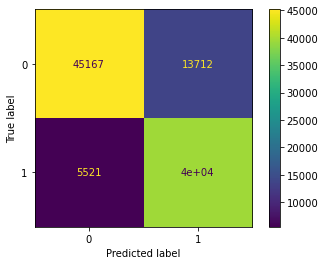

In [8]:
from sklearn.linear_model import LogisticRegression

#params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression()
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8818139821373575
ROC Area under Curve = 0.8904401793195634
Time taken = 60.42870211601257
              precision    recall  f1-score   support

           0    0.96011   0.82574   0.88787     58879
           1    0.80738   0.95514   0.87506     45025

    accuracy                        0.88181    103904
   macro avg    0.88374   0.89044   0.88147    103904
weighted avg    0.89393   0.88181   0.88232    103904



D:\Programowanie\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


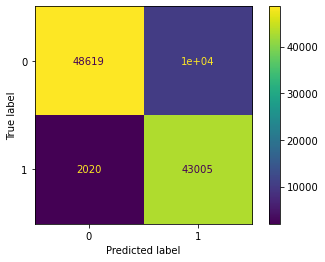

In [9]:
from sklearn.neural_network import MLPClassifier
params_nn = {'hidden_layer_sizes': (50,50,50),
             'activation': 'relu',
             'early_stopping': True}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.8268786572220511
ROC Area under Curve = 0.8320360670792495
Time taken = 0.203749418258667
              precision    recall  f1-score   support

           0    0.88919   0.79336   0.83855     58879
           1    0.76315   0.87072   0.81339     45025

    accuracy                        0.82688    103904
   macro avg    0.82617   0.83204   0.82597    103904
weighted avg    0.83458   0.82688   0.82765    103904



D:\Programowanie\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


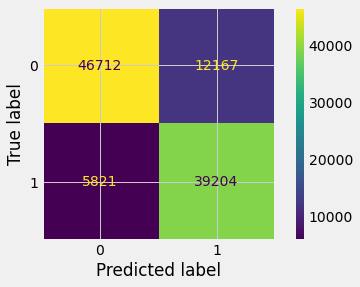

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5, min_samples_leaf=0.05)
model_tree, accuracy_tree, roc_auc_tree, tt_tree = run_model(model_tree, X_train, y_train, X_test, y_test)

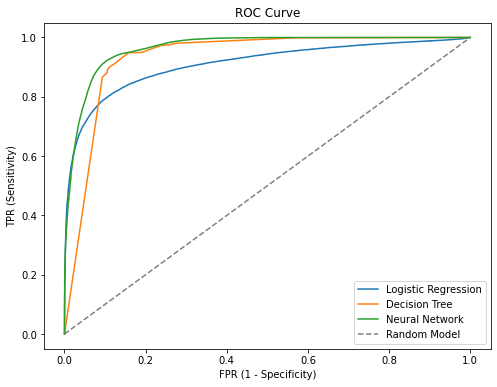

In [16]:
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_tree, tpr_tree, _ = roc_curve(y_test, pred_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

fpr_nn, tpr_nn, _ = roc_curve(y_test, pred_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression') #(AUC = {roc_auc_lr:.2f})
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Model')
plt.xlabel('FPR (1 - Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('ROC Curve')
plt.legend()
plt.show()

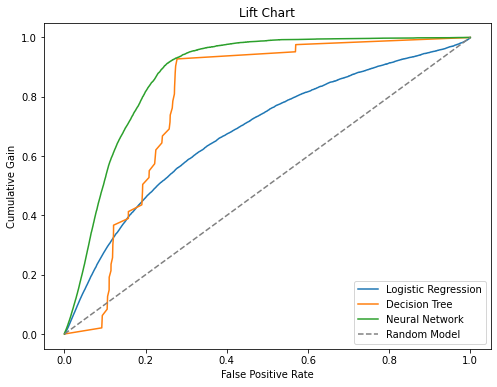

In [44]:
cumulative_gain_lr = np.cumsum(tpr_lr) / np.sum(tpr_lr)
cumulative_gain_tree = np.cumsum(tpr_tree) / np.sum(tpr_tree)
cumulative_gain_nn = np.cumsum(tpr_nn) / np.sum(tpr_nn)

# Plot the lift chart
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, cumulative_gain_lr, label='Logistic Regression')
plt.plot(fpr_tree, cumulative_gain_tree, label='Decision Tree')
plt.plot(fpr_nn, cumulative_gain_nn, label='Neural Network')

# Plot the baseline (random model) for comparison
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Model')

plt.xlabel('False Positive Rate')
plt.ylabel('Cumulative Gain')
plt.title('Lift Chart')
plt.legend()
plt.show()

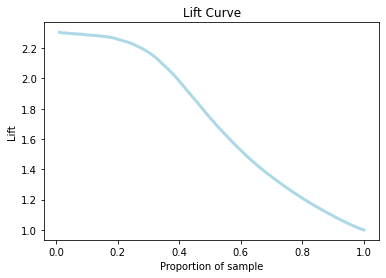

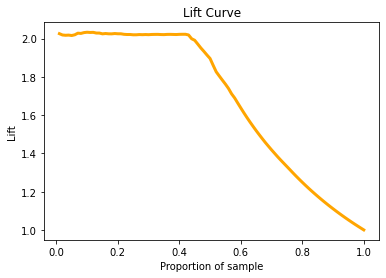

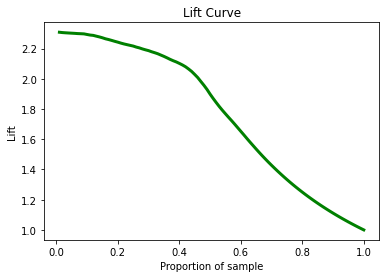

In [19]:
def plot_lift_curve(y_val, y_pred, color, step=0.01):
    
    aux_lift = pd.DataFrame({'real': y_val.ravel(), 'predicted': y_pred})
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
           
   #Plot the figure
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, color, linewidth = 3, markersize = 5)
    #axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

plot_lift_curve(y_test, pred_lr, 'lightblue')
plot_lift_curve(y_test, pred_tree, 'orange')
plot_lift_curve(y_test, pred_nn, 'green')

In [57]:
pred_lr.shape

(103904,)

In [58]:
y_test.shape

(103904, 1)

Accuracy = 0.8841045580535879
ROC Area under Curve = 0.8917270345768549
Time taken = 306.38633131980896
              precision    recall  f1-score   support

           0    0.95527   0.83456   0.89084     58879
           1    0.81433   0.94890   0.87648     45025

    accuracy                        0.88410    103904
   macro avg    0.88480   0.89173   0.88366    103904
weighted avg    0.89420   0.88410   0.88462    103904



D:\Programowanie\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


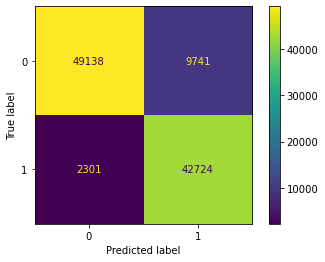

In [12]:
from sklearn.svm import SVC
params_svm = {'C':1, 'gamma':'auto'}
model_svm = SVC(**params_svm)
model_svm, accuracy_svm, roc_auc_svm, tt_svm = run_model(model_svm, X_train, y_train, X_test, y_test)

Accuracy = 0.8912072682476132
ROC Area under Curve = 0.8921385045506751
Time taken = 52.005921840667725
              precision    recall  f1-score   support

           0    0.91984   0.88515   0.90216     58879
           1    0.85687   0.89912   0.87749     45025

    accuracy                        0.89121    103904
   macro avg    0.88835   0.89214   0.88983    103904
weighted avg    0.89255   0.89121   0.89147    103904



D:\Programowanie\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


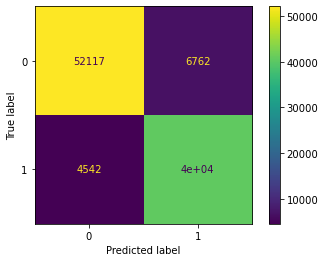

In [13]:
from sklearn.neighbors import KNeighborsClassifier
params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}
model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

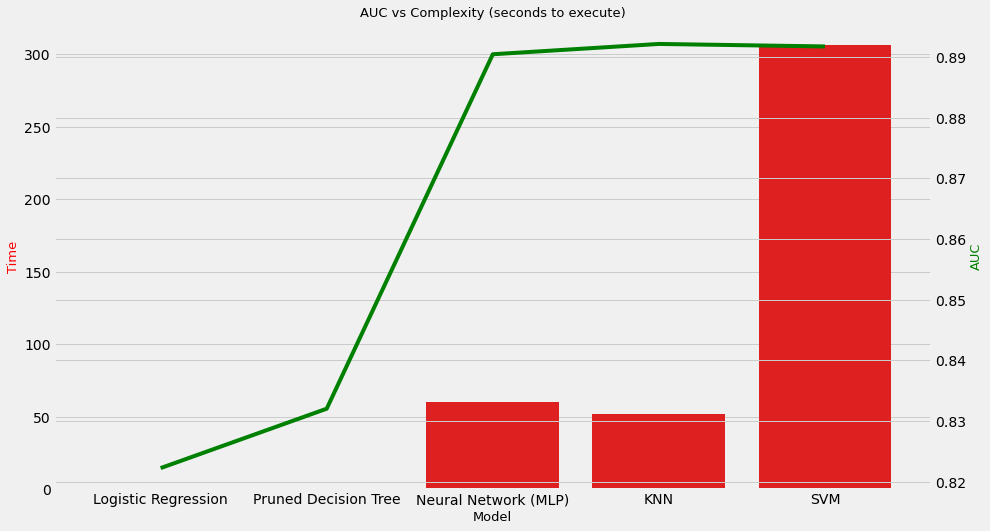

In [17]:
roc_auc_scores = [roc_auc_lr, roc_auc_tree, roc_auc_nn, roc_auc_kn, roc_auc_svm]
tt = [tt_lr, tt_tree, tt_nn, tt_kn, tt_svm]

model_data = {'Model': ['Logistic Regression','Pruned Decision Tree', 'Neural Network (MLP)', 'KNN', 'SVM'],
              'AUC': roc_auc_scores,
              'Time': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
plt.style.use('fivethirtyeight')
ax1.set_title('AUC vs Complexity (seconds to execute)', fontsize=13)
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time (s)', fontsize=13, color='red')
ax2 = sns.barplot(x='Model', y='Time', data = data, color='red')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('AUC', fontsize=13, color='green')
ax2 = sns.lineplot(x='Model', y='AUC', data = data, sort=False, color='green')
ax2.tick_params(axis='y', color='green')

Text(0, 0.5, 'AUC')

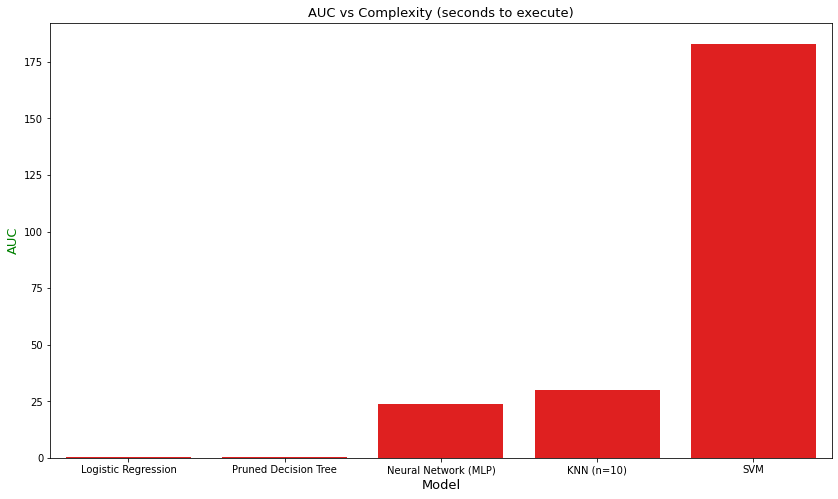

In [20]:
roc_auc_scores = [roc_auc_lr, roc_auc_tree, roc_auc_nn, roc_auc_kn, roc_auc_svm]
tt = [tt_lr, tt_tree, tt_nn, tt_kn, tt_svm]

model_data = {'Model': ['Logistic Regression','Pruned Decision Tree', 'Neural Network (MLP)', 'KNN (n=10)', 'SVM'],
              'AUC': roc_auc_scores,
              'Time': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('AUC vs Complexity (seconds to execute)', fontsize=13)
ax1.set_xlabel('Model', fontsize=13)
ax2 = sns.barplot(x='Model', y='Time', data=data, color='red')
ax1.tick_params(axis='y')
ax1.set_ylabel('AUC', fontsize=13, color='green')
#ax2 = ax1.twinx()
#ax2.set_ylabel('Time (s)', fontsize=13, color='red')
#sns.lineplot(x='Model', y='AUC', data=data, sort=False, color='green')